In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [5]:
heart = pd.read_csv(r"Cases\Heart Attack\heart.csv")

In [6]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X = heart.drop("output", axis = 1)
y = heart["output"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [10]:
dtc = DecisionTreeClassifier(random_state= 2022,
                            max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

In [11]:
param = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [12]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [17]:
gcv  = GridSearchCV(dtc , param_grid = param, verbose=3,
                   cv = kfold,scoring='roc_auc')
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.799 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.796 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.916 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.788 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.799 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.796 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.916 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

[CV 4/5] END max_depth=3, min_samples_leaf=10, min_samples_split=5;, score=0.925 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=10, min_samples_split=5;, score=0.870 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.740 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.815 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.840 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.925 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=10, min_samples_split=10;, score=0.870 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.702 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.781 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.813 total time=   0.0

[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.816 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.937 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.884 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.726 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.816 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.937 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.884 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=0.726 total time=   0.0s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=3)

In [18]:
print(gcv.best_params_)

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [22]:
print(gcv.best_score_)

0.840616482283149


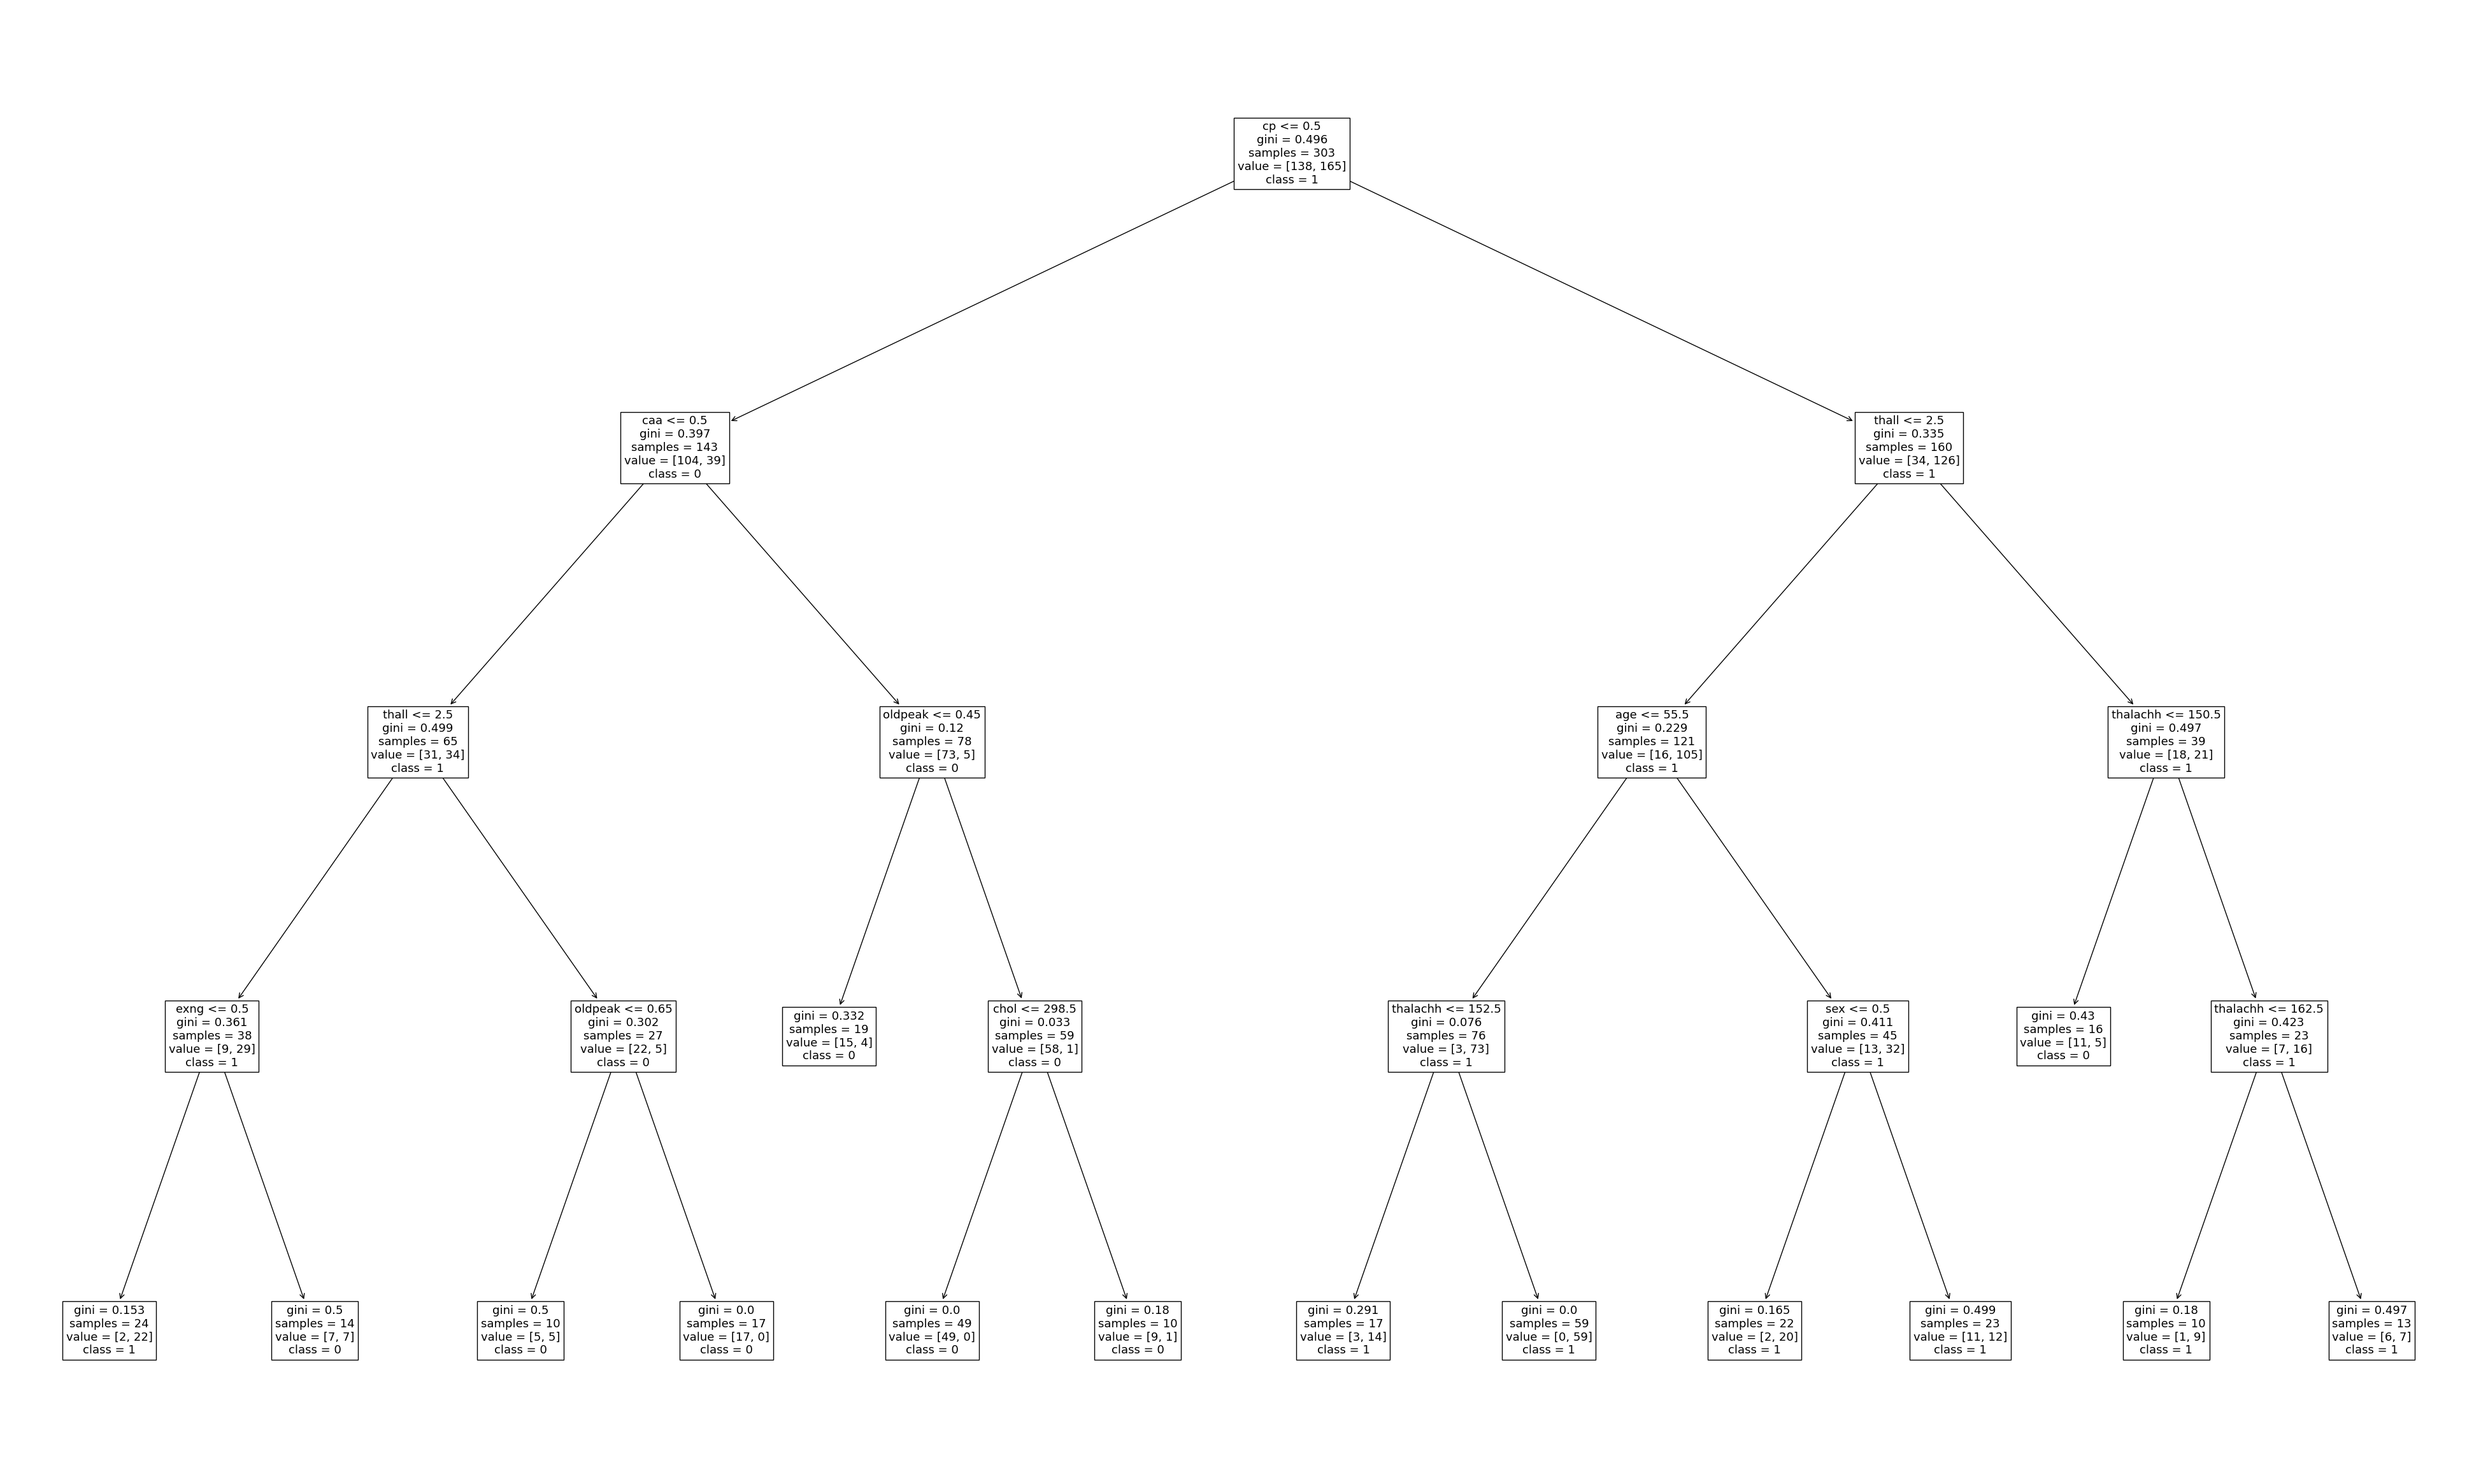

In [19]:
best_model = gcv.best_estimator_
plt.figure(figsize = (50,30))
plot_tree(best_model, feature_names = X.columns,
          class_names=['0','1'], fontsize= 13)
plt.show()

[0.03850703 0.03694899 0.43822578 0.         0.00181885 0.
 0.         0.05551833 0.03361915 0.04626728 0.         0.16356947
 0.18552512]


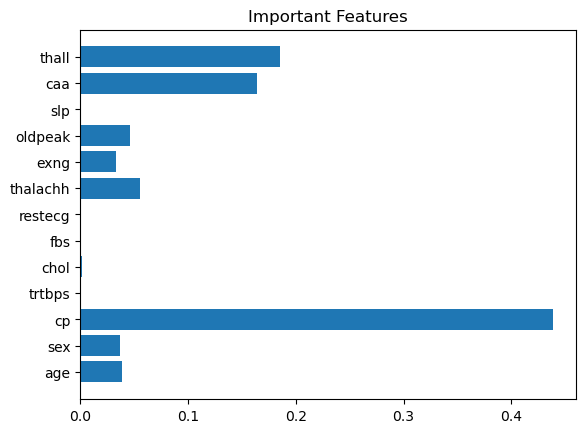

In [21]:
# featurer importance plot

print(best_model.feature_importances_)
imps = best_model.feature_importances_
plt.barh(X.columns, imps)
plt.title("Important Features")
plt.show()